In [1]:
import numpy as np
from scipy.linalg import dft

In [3]:
import matplotlib.pyplot as plt

In [191]:
N = 2**6
x = np.linspace(-1, 1, N)
ks = [3, 5, 7]
y = np.sum([np.sin(2.*np.pi*k*x) for k in ks], axis=0)

In [192]:
k = np.linspace(-1./(2*np.diff(x)[0]), 1./(2*np.diff(x)[0]), N)

F = np.fft.fftshift(dft(N, scale='sqrtn'))
F_H = np.conj(F.T)

Y = F@y
y_ = F_H@Y

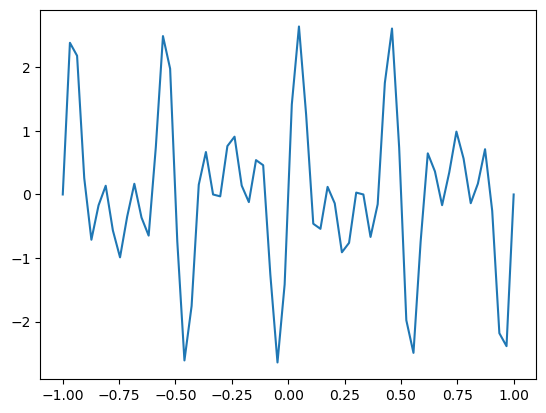

In [193]:
plt.plot(x, y)

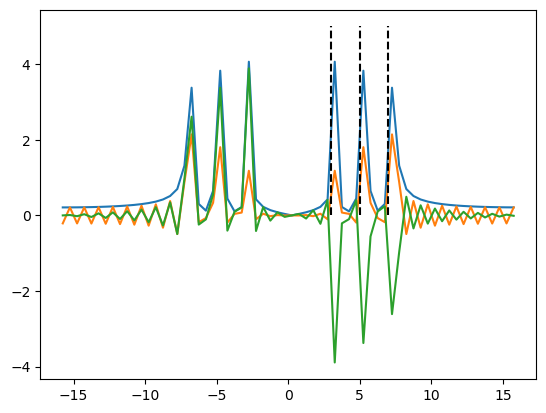

In [194]:
plt.plot(k, np.abs(Y))
plt.plot(k, Y.real)
plt.plot(k, Y.imag)
plt.vlines(ks, 0, 5, 'k', ls='dashed')

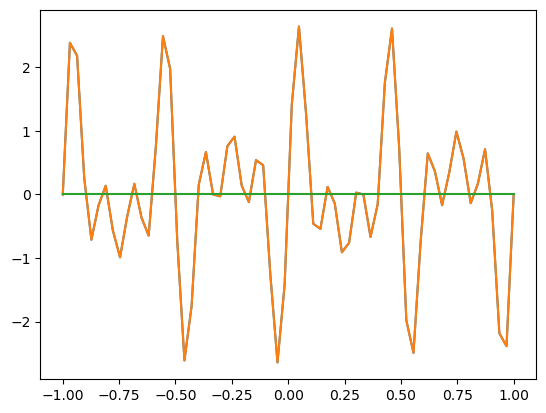

In [195]:
plt.plot(x, y)
plt.plot(x, y_.real)
plt.plot(x, y_.imag)

In [224]:
def kernel(x_p, x_q, l, sig):
    
    X = (x_p[:,None] - x_q[None,:])/l + np.abs(x_p + x_q)
    
    return sig**2 * np.exp(-0.5*X**2)

In [225]:
C = kernel(x, x, 0.1, 2.)

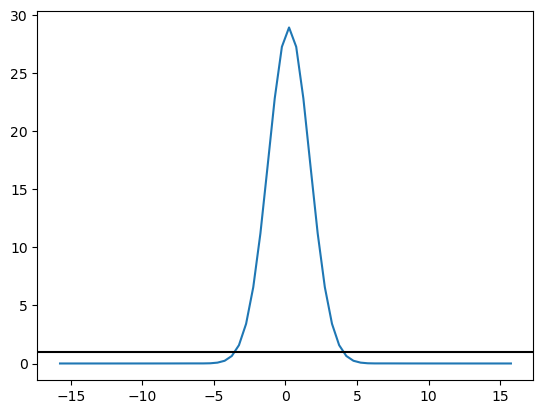

In [226]:
plt.plot(k, np.diag(np.abs(F@C@F_H)))
# plt.semilogy(k, np.diag(np.real(F@C@F_H))/(np.sqrt(N)*(F@kernel(np.zeros(1), x, 0.1, 2)[0]).real))
# plt.plot(k, np.diag(np.imag(F@C@F_H)))
# plt.plot(k, (F@kernel(np.zeros(1), x, 0.1, 2)[0]).real)
# plt.ylim(1e-3, 2e2)
plt.axhline(1, color='k')

In [227]:
(np.real(F@C@F_H)).sum()

255.87103274832236

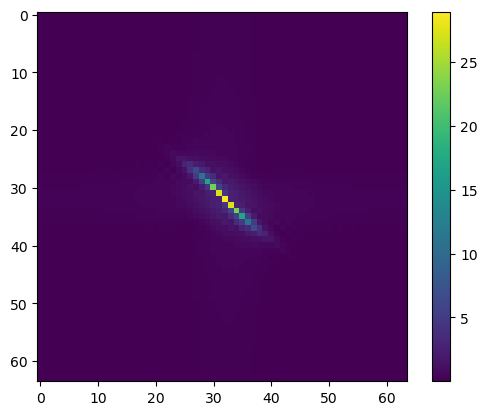

In [228]:
plt.imshow((np.abs(F@C@F_H)))
plt.colorbar()

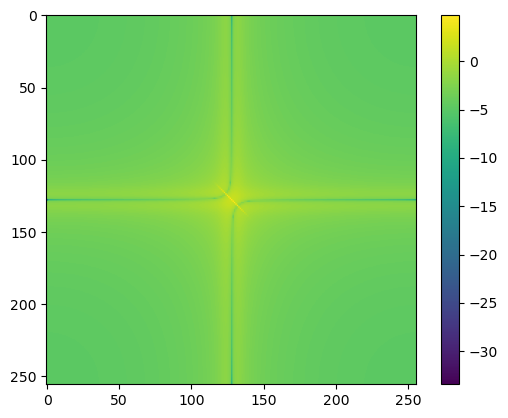

In [117]:
plt.imshow(np.log(np.abs(F@C@F_H)))
plt.colorbar()